In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
from collections import Counter
from sklearn.decomposition import PCA

In [2]:
zoning_df = pd.read_csv('data/zoning.csv')
listing_df = pd.read_csv('data/listing.csv')
sale_df = pd.read_csv('data/sale.csv')

In [3]:
housing_df = pd.merge(zoning_df, listing_df, left_on = "Id", right_on = "Id")

In [4]:
housing_df = pd.merge(housing_df, sale_df, left_on = "Id", right_on = "Id")

In [5]:
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Reg,Lvl,AllPub,FR2,Gtl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,IR1,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,IR1,Lvl,AllPub,Corner,Gtl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,Lvl,AllPub,FR2,Gtl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
housing_df.set_index("Id", inplace=True)

In [7]:
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
Street           1460 non-null object
Alley            91 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [9]:
housing_df.select_dtypes(["object"]).columns

Index(['MSZoning', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'Street', 'Alley', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [10]:
for column in housing_df.select_dtypes(["object"]).columns:
    housing_df[column] = housing_df[column].astype("category")

In [11]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null category
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
LotShape         1460 non-null category
LandContour      1460 non-null category
Utilities        1460 non-null category
LotConfig        1460 non-null category
LandSlope        1460 non-null category
Neighborhood     1460 non-null category
Condition1       1460 non-null category
Condition2       1460 non-null category
BldgType         1460 non-null category
HouseStyle       1460 non-null category
Street           1460 non-null category
Alley            91 non-null category
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null category
RoofMatl         1460 non-null category
Exterior1st      1460 non-null cat

In [12]:
housing_df.MSSubClass = housing_df.MSSubClass.astype('category')
housing_df.OverallQual = housing_df.OverallQual.astype('category')
housing_df.OverallCond = housing_df.OverallCond.astype('category')
housing_df.BsmtFullBath = housing_df.BsmtFullBath.astype('category')
housing_df.BsmtHalfBath = housing_df.BsmtHalfBath.astype('category')
housing_df.FullBath = housing_df.FullBath.astype('category')
housing_df.HalfBath = housing_df.HalfBath.astype('category')
housing_df.BedroomAbvGr = housing_df.BedroomAbvGr.astype('category')
housing_df.KitchenAbvGr = housing_df.KitchenAbvGr.astype('category')
housing_df.TotRmsAbvGrd = housing_df.TotRmsAbvGrd.astype('category')
housing_df.Fireplaces = housing_df.Fireplaces.astype('category')
housing_df.GarageCars = housing_df.GarageCars.astype('category')
housing_df.MoSold = housing_df.MoSold.astype('category')

In [13]:
housing_df.LotFrontage.fillna(housing_df.LotFrontage.mean(), inplace=True)
housing_df.MasVnrArea.fillna(housing_df.MasVnrArea.mean(), inplace=True)
housing_df.GarageYrBlt.fillna(housing_df.GarageYrBlt.mean(), inplace=True)

In [14]:
len(list(housing_df.GarageYrBlt))

1460

In [15]:
def empty_count(feature):
    empty_mask = housing_df[feature].isnull()
    empty_count = len(housing_df[feature][empty_mask])
    return empty_count

def count_empty_total():
    for feature in housing_df.columns:
        empty_count1 = empty_count(feature)
        if empty_count1 > 0:
            print(feature, empty_count1)

In [16]:
empty_count("BsmtExposure")

38

In [17]:
count_empty_total()

Alley 1369
MasVnrType 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [18]:
empty_means_without = ["Alley","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1",
                        "BsmtFinType2", "FireplaceQu","GarageType","GarageFinish",
                        "GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]

In [19]:
def replace_empty(feature, value):
    housing_df[feature].cat.add_categories([value], inplace=True)
    housing_df[feature].fillna(value, inplace=True)

In [20]:
for feature in empty_means_without:
    replace_empty(feature, "None")

In [21]:
housing_df.dropna(inplace=True)

In [22]:
import scipy.stats as st

In [23]:
numeric_df = housing_df.select_dtypes(exclude=["category"])

In [24]:
numeric_df

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,65.000000,8450,2003,2003,196.0,706,0,150,856,856,...,548,0,61,0,0,0,0,0,2008,208500
2,80.000000,9600,1976,1976,0.0,978,0,284,1262,1262,...,460,298,0,0,0,0,0,0,2007,181500
3,68.000000,11250,2001,2002,162.0,486,0,434,920,920,...,608,0,42,0,0,0,0,0,2008,223500
4,60.000000,9550,1915,1970,0.0,216,0,540,756,961,...,642,0,35,272,0,0,0,0,2006,140000
5,84.000000,14260,2000,2000,350.0,655,0,490,1145,1145,...,836,192,84,0,0,0,0,0,2008,250000
6,85.000000,14115,1993,1995,0.0,732,0,64,796,796,...,480,40,30,0,320,0,0,700,2009,143000
7,75.000000,10084,2004,2005,186.0,1369,0,317,1686,1694,...,636,255,57,0,0,0,0,0,2007,307000
8,70.049958,10382,1973,1973,240.0,859,32,216,1107,1107,...,484,235,204,228,0,0,0,350,2009,200000
9,51.000000,6120,1931,1950,0.0,0,0,952,952,1022,...,468,90,0,205,0,0,0,0,2008,129900


In [25]:
numeric_df.drop("SalePrice", axis=1, inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
numeric_df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,2003.0,548,0,61,0,0,0,0,0,2008
2,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,1976.0,460,298,0,0,0,0,0,0,2007
3,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,2001.0,608,0,42,0,0,0,0,0,2008
4,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,1998.0,642,0,35,272,0,0,0,0,2006
5,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,2000.0,836,192,84,0,0,0,0,0,2008


In [27]:
box_cox_trans = st.boxcox(housing_df["LotArea"] + 1)

/opt/conda/lib/python3.6/site-packages/scipy/stats/morestats.py:901: RuntimeWarning: divide by zero encountered in log
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
/opt/conda/lib/python3.6/site-packages/scipy/optimize/optimize.py:2308: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
/opt/conda/lib/python3.6/site-packages/scipy/optimize/optimize.py:1926: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
/opt/conda/lib/python3.6/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.6/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/opt/conda/lib/python3.6/site-packages/scipy/optimize/optimize.py:1929: RuntimeWarning: invalid value encountered in double_scalars
  tm

In [28]:
numeric_log_df = np.log(numeric_df + 1)
numeric_log_df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,4.189655,9.042040,7.602900,7.602900,5.283204,6.561031,0.0,5.017280,6.753438,6.753438,...,7.602900,6.308098,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.0,7.605392
2,4.394449,9.169623,7.589336,7.589336,0.000000,6.886532,0.0,5.652489,7.141245,7.141245,...,7.589336,6.133398,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.0,7.604894
3,4.234107,9.328212,7.601902,7.602401,5.093750,6.188264,0.0,6.075346,6.825460,6.825460,...,7.601902,6.411818,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.0,7.605392
4,4.110874,9.164401,7.557995,7.586296,0.000000,5.379897,0.0,6.293419,6.629363,6.869014,...,7.600402,6.466145,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.0,7.604396
5,4.442651,9.565284,7.601402,7.601402,5.860786,6.486161,0.0,6.196444,7.044033,7.044033,...,7.601402,6.729824,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.0,7.605392


In [29]:
categorical_df = housing_df.select_dtypes(include=["category"])

In [30]:
categorical_df.head()

,MSSubClass,MSZoning,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,2,TA,TA,Y,None,None,None,2,WD,Normal
2,20,RL,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,2,TA,TA,Y,None,None,None,5,WD,Normal
3,60,RL,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,2,TA,TA,Y,None,None,None,9,WD,Normal
4,70,RL,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,3,TA,TA,Y,None,None,None,2,WD,Abnorml
5,60,RL,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,3,TA,TA,Y,None,None,None,12,WD,Normal


In [31]:
categorical_encoded_df = pd.get_dummies(categorical_df)

In [32]:
categorical_encoded_df.head()

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [33]:
categorical_encoded_df.shape

(1451, 359)

In [34]:
ms_sub_class_encoded_cols = [col for col in categorical_encoded_df.columns if "MSSubClass" in col]
ms_sub_class_encoded_cols

['MSSubClass_20',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'MSSubClass_120',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190']

In [35]:
categorical_encoded_df[ms_sub_class_encoded_cols].head()

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
Id,,,,,,,,,,,,,,,
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [36]:
categorical_encoded_df[ms_sub_class_encoded_cols].sum()

MSSubClass_20     532
MSSubClass_30      69
MSSubClass_40       4
MSSubClass_45      12
MSSubClass_50     144
MSSubClass_60     296
MSSubClass_70      60
MSSubClass_75      16
MSSubClass_80      57
MSSubClass_85      20
MSSubClass_90      52
MSSubClass_120     86
MSSubClass_160     63
MSSubClass_180     10
MSSubClass_190     30
dtype: int64

In [37]:
categorical_encoded_df[ms_sub_class_encoded_cols].values.sum()

1451

In [38]:
categorical_encoded_df[ms_sub_class_encoded_cols].shape

(1451, 15)

In [39]:
stats = pd.DataFrame()
stats["mean"] = categorical_encoded_df[ms_sub_class_encoded_cols].mean()
stats["std"] = categorical_encoded_df[ms_sub_class_encoded_cols].std()
stats["var"] = categorical_encoded_df[ms_sub_class_encoded_cols].var()
stats.head()

,mean,std,var
MSSubClass_20,0.366644,0.482054,0.232376
MSSubClass_30,0.047553,0.212893,0.045323
MSSubClass_40,0.002757,0.052450,0.002751
MSSubClass_45,0.008270,0.090595,0.008207
MSSubClass_50,0.099242,0.299090,0.089455


In [40]:
stats.sort_values("std", ascending=False)

,mean,std,var
MSSubClass_20,0.366644,0.482054,0.232376
MSSubClass_60,0.203997,0.403106,0.162494
MSSubClass_50,0.099242,0.299090,0.089455
MSSubClass_120,0.059269,0.236210,0.055795
MSSubClass_30,0.047553,0.212893,0.045323
MSSubClass_160,0.043418,0.203867,0.041562
MSSubClass_70,0.041351,0.199169,0.039668
MSSubClass_80,0.039283,0.194335,0.037766
MSSubClass_90,0.035837,0.185949,0.034577
MSSubClass_190,0.020675,0.142344,0.020262


In [41]:
stats = pd.DataFrame()
stats["mean"] = categorical_encoded_df.mean()
stats["std"] = categorical_encoded_df.std()
stats["var"] = categorical_encoded_df.var()
categorical_encoded_features_significant_variance_stats = stats[stats["var"] > 0.2].sort_values("std", ascending=False)
categorical_encoded_features_insignificant_variance_stats = stats[stats["var"] < 0.2].sort_values("std", ascending = False)
categorical_encoded_features_significant_variance_stats.head()

,mean,std,var
HouseStyle_1Story,0.496899,0.500163,0.250163
HeatingQC_Ex,0.505858,0.500138,0.250138
KitchenQual_TA,0.505858,0.500138,0.250138
FullBath_2,0.524466,0.499573,0.249573
Fireplaces_0,0.472088,0.499392,0.249393


In [42]:
numeric_log_df.shape

(1451, 23)

In [43]:
categorical_df.shape

(1451, 56)

In [44]:
numeric_first_five_features = numeric_log_df.columns[:5]
numeric_first_five_features

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea'], dtype='object')

In [45]:
numeric_log_std_sc_df = (numeric_log_df - numeric_log_df.mean()) / (numeric_log_df.std())
numeric_log_gel_sc_df = (numeric_log_df - numeric_log_df.mean()) / (2*numeric_log_df.std())

In [46]:
stats = pd.DataFrame()
stats['mean'] = numeric_log_std_sc_df[numeric_first_five_features].mean()
stats['std'] = numeric_log_std_sc_df[numeric_first_five_features].std()
stats['var'] = numeric_log_std_sc_df[numeric_first_five_features].var()
stats

,mean,std,var
LotFrontage,2.199301e-14,1.0,1.0
LotArea,8.004126e-15,1.0,1.0
YearBuilt,-8.855706e-14,1.0,1.0
YearRemodAdd,1.895718e-13,1.0,1.0
MasVnrArea,-8.185504e-16,1.0,1.0


In [47]:
stats = pd.DataFrame()
stats["mean"] = numeric_log_gel_sc_df[numeric_first_five_features].mean()
stats['std'] = numeric_log_gel_sc_df[numeric_first_five_features].std()
stats['var'] = numeric_log_gel_sc_df[numeric_first_five_features].var()
stats

,mean,std,var
LotFrontage,1.099651e-14,0.5,0.25
LotArea,4.002063e-15,0.5,0.25
YearBuilt,-4.427853e-14,0.5,0.25
YearRemodAdd,9.478592e-14,0.5,0.25
MasVnrArea,-4.092752e-16,0.5,0.25


In [48]:
categorical_encoded_features_significant_variance_stats.head()

,mean,std,var
HouseStyle_1Story,0.496899,0.500163,0.250163
HeatingQC_Ex,0.505858,0.500138,0.250138
KitchenQual_TA,0.505858,0.500138,0.250138
FullBath_2,0.524466,0.499573,0.249573
Fireplaces_0,0.472088,0.499392,0.249393


In [49]:
categorical_encoded_features_significant_variance = categorical_encoded_df[categorical_encoded_features_significant_variance_stats.index]
categorical_encoded_features_insignificant_variance = categorical_encoded_df[categorical_encoded_features_insignificant_variance_stats.index]

In [50]:
categorical_encoded_features_significant_variance_centered = (categorical_encoded_features_significant_variance - categorical_encoded_features_significant_variance.mean())
categorical_encoded_features_significant_variance_centered

,HouseStyle_1Story,HeatingQC_Ex,KitchenQual_TA,FullBath_2,Fireplaces_0,FireplaceQu_None,BedroomAbvGr_3,FullBath_1,Fireplaces_1,BsmtQual_TA,...,LotShape_IR1,ExterQual_Gd,MasVnrType_BrkFace,HouseStyle_2Story,BsmtFinType1_Unf,HeatingQC_TA,GarageFinish_RFn,BsmtFinType1_GLQ,LotConfig_Inside,TotRmsAbvGrd_6
Id,,,,,,,,,,,,,,,,,,,,,
1,-0.496899,0.494142,-0.505858,0.475534,0.527912,0.527912,0.448656,-0.447278,-0.446589,-0.446589,...,-0.332185,0.668504,0.693315,0.695382,-0.29428,-0.29428,0.711923,0.715369,0.279807,-0.276361
2,0.503101,0.494142,0.494142,0.475534,-0.472088,-0.472088,0.448656,-0.447278,0.553411,-0.446589,...,-0.332185,-0.331496,-0.306685,-0.304618,-0.29428,-0.29428,0.711923,-0.284631,-0.720193,0.723639
3,-0.496899,0.494142,-0.505858,0.475534,-0.472088,-0.472088,0.448656,-0.447278,0.553411,-0.446589,...,0.667815,0.668504,0.693315,0.695382,-0.29428,-0.29428,0.711923,0.715369,0.279807,0.723639
4,-0.496899,-0.505858,-0.505858,-0.524466,-0.472088,-0.472088,0.448656,0.552722,0.553411,0.553411,...,0.667815,-0.331496,-0.306685,0.695382,-0.29428,-0.29428,-0.288077,-0.284631,-0.720193,-0.276361
5,-0.496899,0.494142,-0.505858,0.475534,-0.472088,-0.472088,-0.551344,-0.447278,0.553411,-0.446589,...,0.667815,0.668504,0.693315,0.695382,-0.29428,-0.29428,0.711923,0.715369,-0.720193,-0.276361
6,-0.496899,0.494142,0.494142,-0.524466,0.527912,0.527912,-0.551344,0.552722,-0.446589,-0.446589,...,0.667815,-0.331496,-0.306685,-0.304618,-0.29428,-0.29428,-0.288077,0.715369,0.279807,-0.276361
7,0.503101,0.494142,-0.505858,0.475534,-0.472088,-0.472088,0.448656,-0.447278,0.553411,-0.446589,...,-0.332185,0.668504,-0.306685,-0.304618,-0.29428,-0.29428,0.711923,0.715369,0.279807,-0.276361
8,-0.496899,0.494142,0.494142,0.475534,-0.472088,-0.472088,0.448656,-0.447278,-0.446589,-0.446589,...,0.667815,-0.331496,-0.306685,0.695382,-0.29428,-0.29428,0.711923,-0.284631,-0.720193,-0.276361
9,-0.496899,-0.505858,0.494142,0.475534,-0.472088,-0.472088,-0.551344,-0.447278,-0.446589,0.553411,...,-0.332185,-0.331496,-0.306685,-0.304618,0.70572,-0.29428,-0.288077,-0.284631,0.279807,-0.276361


In [51]:
def display_outliers(dataframe, col, params = 1.5):
    Q1 = np.percentile(dataframe[col], 25)
    Q3 = np.percentile(dataframe[col], 75)
    tukey = np.abs(Q1 - Q3) * params
    less_than_Q1_mask = dataframe[col] < Q1 - tukey
    more_than_Q3_mask = dataframe[col] > Q3 + tukey
    return dataframe[less_than_Q1_mask | more_than_Q3_mask] 

In [52]:
numeric_log_std_sc_df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,-0.086159,-0.131660,1.050988,0.882077,1.196921,0.780348,-0.356459,-0.337953,0.003949,-0.802707,...,1.022657,0.344667,-0.948046,0.847868,-0.404415,-0.128882,-0.293653,-0.069585,-0.191027,0.139266
2,0.564246,0.114970,0.169227,-0.418809,-0.810699,0.889200,-0.356459,0.003817,0.341633,0.421298,...,-0.092051,0.224932,1.247340,-1.071053,-0.404415,-0.128882,-0.293653,-0.069585,-0.191027,-0.613108
3,0.055015,0.421541,0.986081,0.834209,1.124929,0.655689,-0.356459,0.231333,0.066663,-0.575390,...,0.940602,0.415754,-0.948046,0.677726,-0.404415,-0.128882,-0.293653,-0.069585,-0.191027,0.139266
4,-0.336359,0.104877,-1.868066,-0.710307,-0.810699,0.385358,-0.356459,0.348666,-0.104089,-0.437922,...,0.817367,0.452988,-0.948046,0.595113,2.842436,-0.128882,-0.293653,-0.069585,-0.191027,-1.365857
5,0.717330,0.879824,0.953603,0.738402,1.416403,0.755310,-0.356459,0.296489,0.256986,0.114475,...,0.899545,0.633707,1.078750,0.994569,-0.404415,-0.128882,-0.293653,-0.069585,-0.191027,0.139266


In [53]:
numeric_log_gel_sc_df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,-0.043080,-0.065830,0.525494,0.441038,0.598461,0.390174,-0.17823,-0.168977,0.001975,-0.401354,...,0.511328,0.172334,-0.474023,0.423934,-0.202207,-0.064441,-0.146826,-0.034792,-0.095513,0.069633
2,0.282123,0.057485,0.084614,-0.209405,-0.405349,0.444600,-0.17823,0.001909,0.170817,0.210649,...,-0.046026,0.112466,0.623670,-0.535526,-0.202207,-0.064441,-0.146826,-0.034792,-0.095513,-0.306554
3,0.027507,0.210770,0.493040,0.417104,0.562464,0.327844,-0.17823,0.115667,0.033331,-0.287695,...,0.470301,0.207877,-0.474023,0.338863,-0.202207,-0.064441,-0.146826,-0.034792,-0.095513,0.069633
4,-0.168179,0.052438,-0.934033,-0.355154,-0.405349,0.192679,-0.17823,0.174333,-0.052045,-0.218961,...,0.408684,0.226494,-0.474023,0.297557,1.421218,-0.064441,-0.146826,-0.034792,-0.095513,-0.682929
5,0.358665,0.439912,0.476802,0.369201,0.708201,0.377655,-0.17823,0.148245,0.128493,0.057237,...,0.449772,0.316854,0.539375,0.497284,-0.202207,-0.064441,-0.146826,-0.034792,-0.095513,0.069633


In [54]:
print("Column.             Standard      Gelman ")
print("--------------------------------------------")
for col in numeric_log_std_sc_df.columns:
    print("{:20} {:12} {}".format(col, 
                               str(display_outliers(numeric_log_std_sc_df, col).shape),
                               str(display_outliers(numeric_log_gel_sc_df, col).shape)
                              ))

Column.             Standard      Gelman 
--------------------------------------------
LotFrontage          (122, 23)    (122, 23)
LotArea              (128, 23)    (128, 23)
YearBuilt            (9, 23)      (9, 23)
YearRemodAdd         (0, 23)      (0, 23)
MasVnrArea           (0, 23)      (0, 23)
BsmtFinSF1           (0, 23)      (0, 23)
BsmtFinSF2           (167, 23)    (167, 23)
BsmtUnfSF            (125, 23)    (125, 23)
TotalBsmtSF          (52, 23)     (52, 23)
FirstFlrSF           (7, 23)      (7, 23)
SecondFlrSF          (0, 23)      (0, 23)
LowQualFinSF         (26, 23)     (26, 23)
GrLivArea            (10, 23)     (10, 23)
GarageYrBlt          (1, 23)      (1, 23)
GarageArea           (84, 23)     (84, 23)
WoodDeckSF           (0, 23)      (0, 23)
OpenPorchSF          (0, 23)      (0, 23)
EnclosedPorch        (207, 23)    (207, 23)
ThreeSsnPorch        (24, 23)     (24, 23)
ScreenPorch          (116, 23)    (116, 23)
PoolArea             (7, 23)      (7, 23)
MiscVal       

In [55]:
from collections import Counter

In [56]:
def multiple_outliers(dataframe, count=2):
    raw_outliers = []
    for col in dataframe:
        outlier_df = display_outliers(dataframe, col)
        raw_outliers = raw_outliers + list(outlier_df.index)
        
    outlier_count = Counter(raw_outliers)
    outliers = [k for k, v in outlier_count.items() if v > count]
    return outliers

In [57]:
len(multiple_outliers(numeric_log_std_sc_df, 5)), len(multiple_outliers(numeric_log_gel_sc_df,5))

(2, 2)

In [58]:
len(multiple_outliers(numeric_log_std_sc_df, 3)) / len(numeric_log_std_sc_df)

0.013783597518952447

In [59]:
len(multiple_outliers(numeric_log_gel_sc_df, 3)) / len(numeric_log_gel_sc_df)

0.013783597518952447

In [60]:
multiple_outliers(numeric_log_std_sc_df,3)

[198,
 261,
 524,
 600,
 615,
 650,
 765,
 1008,
 1174,
 1299,
 186,
 829,
 1350,
 1025,
 1387,
 521,
 534,
 706,
 1101,
 1180]

In [61]:
numeric_log_std_sc_out_rem_df = numeric_log_std_sc_df.drop(multiple_outliers(numeric_log_std_sc_df, 3))
numeric_log_gel_sc_out_rem_df = numeric_log_gel_sc_df.drop(multiple_outliers(numeric_log_gel_sc_df, 3))

In [62]:
categorical_encoded_features_significant_variance_centered_out_rem = categorical_encoded_features_significant_variance_centered.drop(multiple_outliers(numeric_log_gel_sc_df, 3))

In [63]:
display(categorical_encoded_features_significant_variance_centered_out_rem.head())
display(numeric_log_gel_sc_out_rem_df.head())

,HouseStyle_1Story,HeatingQC_Ex,KitchenQual_TA,FullBath_2,Fireplaces_0,FireplaceQu_None,BedroomAbvGr_3,FullBath_1,Fireplaces_1,BsmtQual_TA,...,LotShape_IR1,ExterQual_Gd,MasVnrType_BrkFace,HouseStyle_2Story,BsmtFinType1_Unf,HeatingQC_TA,GarageFinish_RFn,BsmtFinType1_GLQ,LotConfig_Inside,TotRmsAbvGrd_6
Id,,,,,,,,,,,,,,,,,,,,,
1,-0.496899,0.494142,-0.505858,0.475534,0.527912,0.527912,0.448656,-0.447278,-0.446589,-0.446589,...,-0.332185,0.668504,0.693315,0.695382,-0.29428,-0.29428,0.711923,0.715369,0.279807,-0.276361
2,0.503101,0.494142,0.494142,0.475534,-0.472088,-0.472088,0.448656,-0.447278,0.553411,-0.446589,...,-0.332185,-0.331496,-0.306685,-0.304618,-0.29428,-0.29428,0.711923,-0.284631,-0.720193,0.723639
3,-0.496899,0.494142,-0.505858,0.475534,-0.472088,-0.472088,0.448656,-0.447278,0.553411,-0.446589,...,0.667815,0.668504,0.693315,0.695382,-0.29428,-0.29428,0.711923,0.715369,0.279807,0.723639
4,-0.496899,-0.505858,-0.505858,-0.524466,-0.472088,-0.472088,0.448656,0.552722,0.553411,0.553411,...,0.667815,-0.331496,-0.306685,0.695382,-0.29428,-0.29428,-0.288077,-0.284631,-0.720193,-0.276361
5,-0.496899,0.494142,-0.505858,0.475534,-0.472088,-0.472088,-0.551344,-0.447278,0.553411,-0.446589,...,0.667815,0.668504,0.693315,0.695382,-0.29428,-0.29428,0.711923,0.715369,-0.720193,-0.276361


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,-0.043080,-0.065830,0.525494,0.441038,0.598461,0.390174,-0.17823,-0.168977,0.001975,-0.401354,...,0.511328,0.172334,-0.474023,0.423934,-0.202207,-0.064441,-0.146826,-0.034792,-0.095513,0.069633
2,0.282123,0.057485,0.084614,-0.209405,-0.405349,0.444600,-0.17823,0.001909,0.170817,0.210649,...,-0.046026,0.112466,0.623670,-0.535526,-0.202207,-0.064441,-0.146826,-0.034792,-0.095513,-0.306554
3,0.027507,0.210770,0.493040,0.417104,0.562464,0.327844,-0.17823,0.115667,0.033331,-0.287695,...,0.470301,0.207877,-0.474023,0.338863,-0.202207,-0.064441,-0.146826,-0.034792,-0.095513,0.069633
4,-0.168179,0.052438,-0.934033,-0.355154,-0.405349,0.192679,-0.17823,0.174333,-0.052045,-0.218961,...,0.408684,0.226494,-0.474023,0.297557,1.421218,-0.064441,-0.146826,-0.034792,-0.095513,-0.682929
5,0.358665,0.439912,0.476802,0.369201,0.708201,0.377655,-0.17823,0.148245,0.128493,0.057237,...,0.449772,0.316854,0.539375,0.497284,-0.202207,-0.064441,-0.146826,-0.034792,-0.095513,0.069633


In [64]:
numeric_gelman_categorical_significant = pd.merge(categorical_encoded_features_significant_variance_centered_out_rem, numeric_log_gel_sc_out_rem_df,
                                                 left_index=True, right_index=True)

In [65]:
numeric_gelman_categorical_significant.head()


,HouseStyle_1Story,HeatingQC_Ex,KitchenQual_TA,FullBath_2,Fireplaces_0,FireplaceQu_None,BedroomAbvGr_3,FullBath_1,Fireplaces_1,BsmtQual_TA,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,-0.496899,0.494142,-0.505858,0.475534,0.527912,0.527912,0.448656,-0.447278,-0.446589,-0.446589,...,0.511328,0.172334,-0.474023,0.423934,-0.202207,-0.064441,-0.146826,-0.034792,-0.095513,0.069633
2,0.503101,0.494142,0.494142,0.475534,-0.472088,-0.472088,0.448656,-0.447278,0.553411,-0.446589,...,-0.046026,0.112466,0.623670,-0.535526,-0.202207,-0.064441,-0.146826,-0.034792,-0.095513,-0.306554
3,-0.496899,0.494142,-0.505858,0.475534,-0.472088,-0.472088,0.448656,-0.447278,0.553411,-0.446589,...,0.470301,0.207877,-0.474023,0.338863,-0.202207,-0.064441,-0.146826,-0.034792,-0.095513,0.069633
4,-0.496899,-0.505858,-0.505858,-0.524466,-0.472088,-0.472088,0.448656,0.552722,0.553411,0.553411,...,0.408684,0.226494,-0.474023,0.297557,1.421218,-0.064441,-0.146826,-0.034792,-0.095513,-0.682929
5,-0.496899,0.494142,-0.505858,0.475534,-0.472088,-0.472088,-0.551344,-0.447278,0.553411,-0.446589,...,0.449772,0.316854,0.539375,0.497284,-0.202207,-0.064441,-0.146826,-0.034792,-0.095513,0.069633


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.decomposition import PCA
pca_log_std_sc_out_rem = PCA()
pca_log_gel_sc_out_rem = PCA()
pca_num_gel_cat = PCA()

pca_log_std_sc_out_rem.fit(numeric_log_std_sc_out_rem_df)
pca_log_gel_sc_out_rem.fit(numeric_log_gel_sc_out_rem_df)
pca_num_gel_cat.fit(numeric_gelman_categorical_significant)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

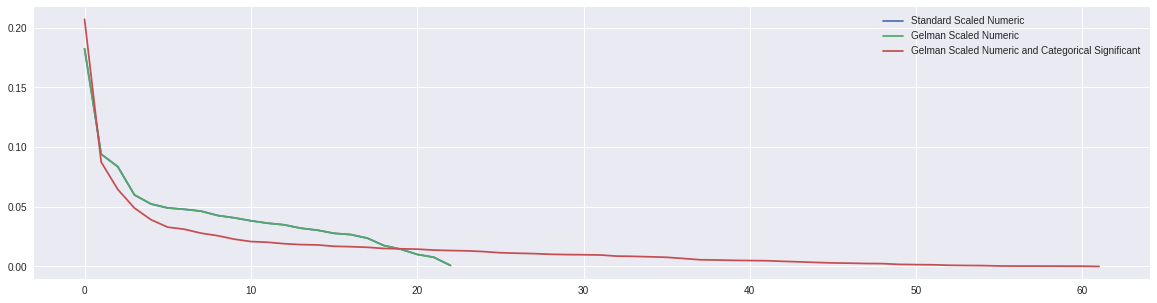

In [67]:
plt.figure(figsize = (20,5))

plt.plot(pca_log_std_sc_out_rem.explained_variance_ratio_, label = "Standard Scaled Numeric")
plt.plot(pca_log_gel_sc_out_rem.explained_variance_ratio_, label = "Gelman Scaled Numeric")
plt.plot(pca_num_gel_cat.explained_variance_ratio_, label = "Gelman Scaled Numeric and Categorical Significant")
plt.legend()

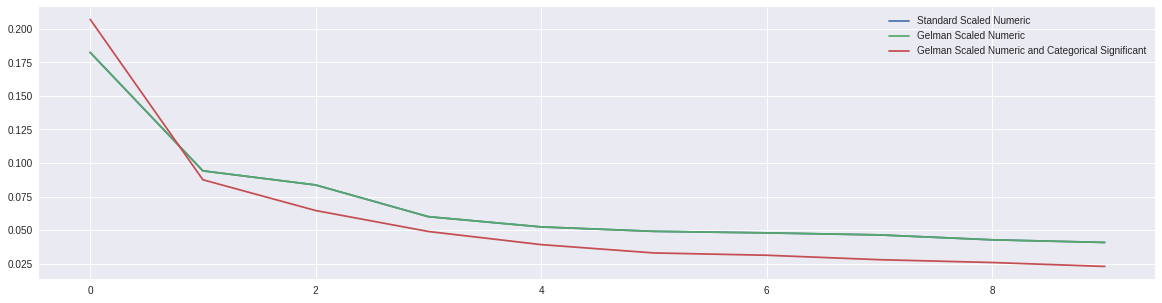

In [68]:
plt.figure(figsize = (20,5))

plt.plot(pca_log_std_sc_out_rem.explained_variance_ratio_[:10], label = "Standard Scaled Numeric")
plt.plot(pca_log_gel_sc_out_rem.explained_variance_ratio_[:10], label = "Gelman Scaled Numeric")
plt.plot(pca_num_gel_cat.explained_variance_ratio_[:10], label = "Gelman Scaled Numeric and Categorical Significant")
plt.legend()

In [69]:
pca_log_std_sc_out_rem = PCA(8)
pca_log_gel_sc_out_rem = PCA(8)
pca_num_gel_cat = PCA(8)

pca_log_std_sc_out_rem.fit(numeric_log_std_sc_out_rem_df)
pca_log_gel_sc_out_rem.fit(numeric_log_gel_sc_out_rem_df)
pca_num_gel_cat.fit(numeric_gelman_categorical_significant)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [70]:
L_log_std_sc_out_rem = pca_log_std_sc_out_rem.explained_variance_ratio_
L_log_gel_sc_out_rem = pca_log_gel_sc_out_rem.explained_variance_ratio_
L_num_gel_cat = pca_num_gel_cat.explained_variance_ratio_

In [71]:
L_log_gel_sc_out_rem

array([ 0.18242392,  0.09413378,  0.08360621,  0.05993726,  0.05233514,
        0.04898372,  0.04782764,  0.04635366])

In [72]:
P_log_std_sc_out_rem = pd.DataFrame(pca_log_std_sc_out_rem.components_, columns = numeric_log_std_sc_out_rem_df.columns)
P_log_gel_sc_out_rem = pd.DataFrame(pca_log_gel_sc_out_rem.components_, columns = numeric_log_gel_sc_out_rem_df.columns)
P_num_gel_cat = pd.DataFrame(pca_num_gel_cat.components_, columns = numeric_gelman_categorical_significant.columns)

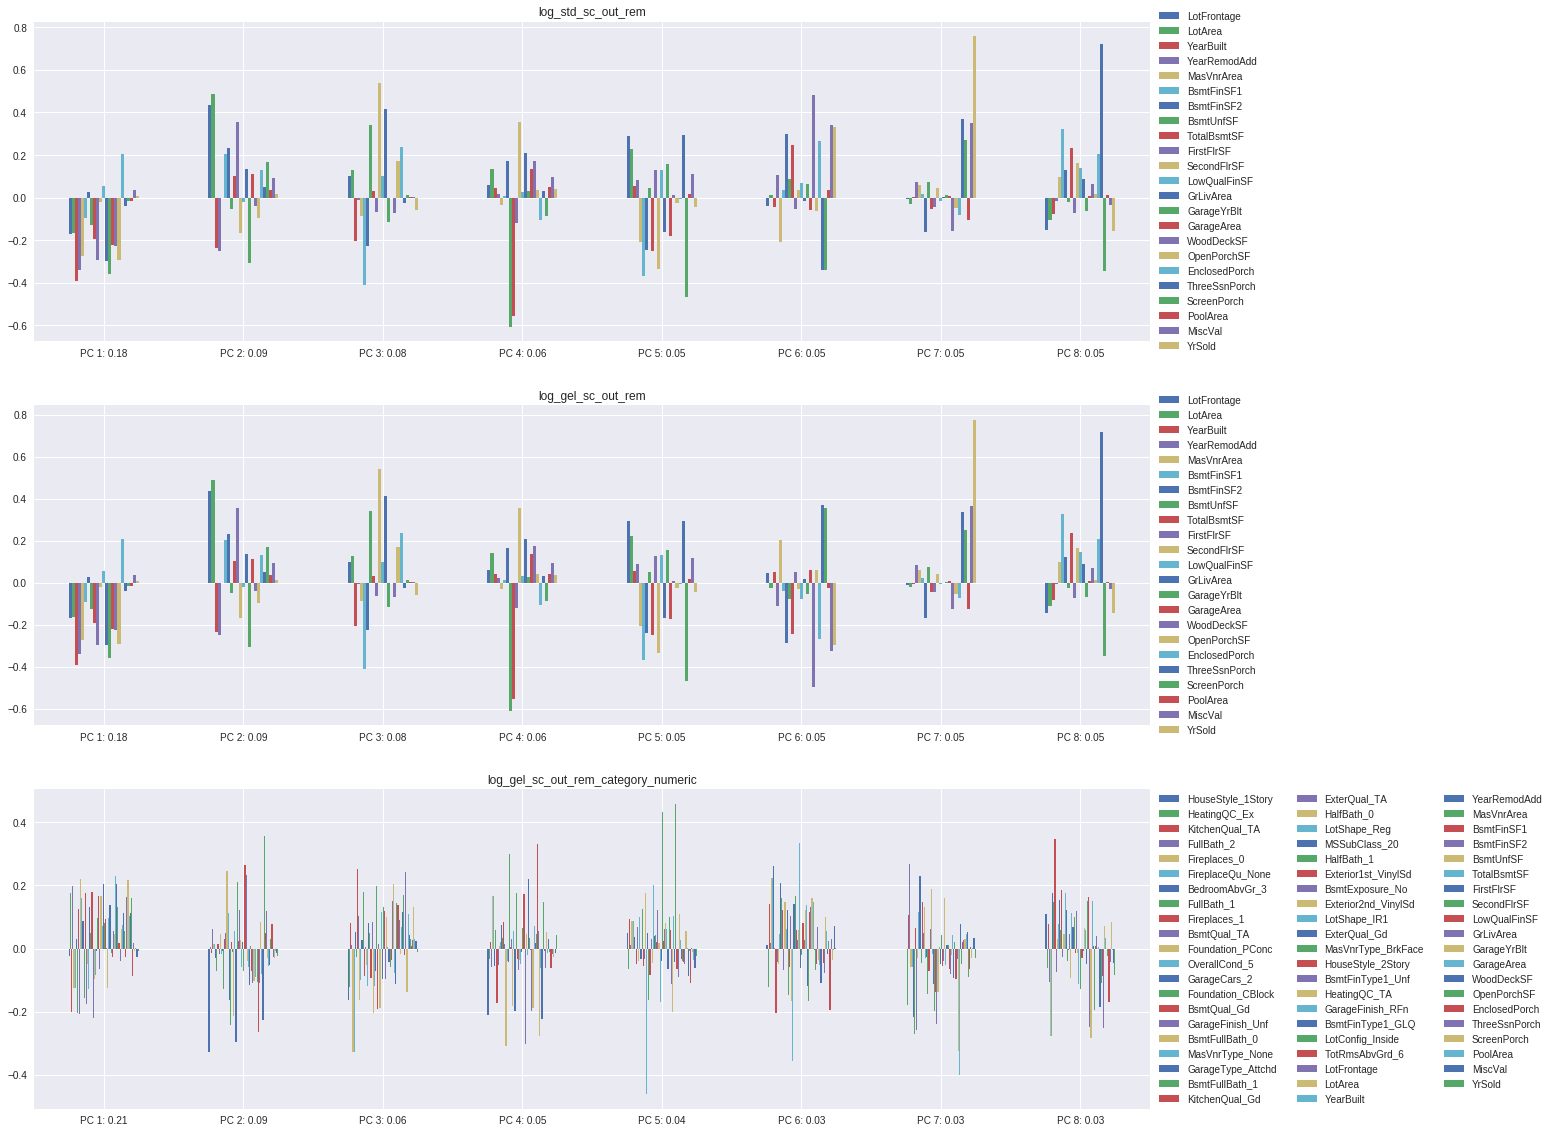

In [73]:
_, ax = plt.subplots(3, 1, figsize = (20,20))

P_log_std_sc_out_rem.plot(kind="bar", title = "log_std_sc_out_rem", ax=ax[0], rot=0)
P_log_gel_sc_out_rem.plot(kind = "bar", title = "log_gel_sc_out_rem", ax=ax[1], rot=0)
P_num_gel_cat.plot(kind = "bar", title = "log_gel_sc_out_rem_category_numeric", ax=ax[2], rot=0)

ax[0]. legend(loc = "center left", mode = "expand", bbox_to_anchor = (1,0.5))
ax[1]. legend(loc = "center left", mode="expand", bbox_to_anchor = (1,.5))
ax[2]. legend(loc = "center left", bbox_to_anchor=(1, 0.5), ncol=3)


ax[0].set_xticklabels(["PC " + str(i+1) + ": " + str(round(ratio,2)) for i, ratio in enumerate(L_log_std_sc_out_rem)])
ax[1].set_xticklabels(["PC " + str(i+1) + ": " + str(round(ratio,2)) for i, ratio in enumerate(L_log_gel_sc_out_rem)])
ax[2].set_xticklabels(["PC " + str(i+1) + ": " + str(round(ratio,2)) for i, ratio in enumerate(L_num_gel_cat)]);

In [74]:
P_num_gel_cat
P_num_gel_cat_abs = P_num_gel_cat.abs()
P_num_gel_cat_abs

,HouseStyle_1Story,HeatingQC_Ex,KitchenQual_TA,FullBath_2,Fireplaces_0,FireplaceQu_None,BedroomAbvGr_3,FullBath_1,Fireplaces_1,BsmtQual_TA,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
0,0.023294,0.175683,0.200566,0.198547,0.126162,0.126162,0.030600,0.204862,0.124821,0.206235,...,0.215661,0.102224,0.112756,0.160149,0.088299,0.017616,0.008524,0.002020,0.025065,0.006472
1,0.326450,0.004157,0.012897,0.063161,0.013547,0.013547,0.031120,0.070834,0.014329,0.018588,...,0.030605,0.054893,0.051572,0.031298,0.077321,0.027935,0.029612,0.008428,0.012653,0.022282
2,0.162880,0.120926,0.081403,0.010976,0.328357,0.328357,0.053339,0.025129,0.251116,0.101858,...,0.137780,0.109266,0.043656,0.030748,0.007860,0.027783,0.130361,0.031232,0.024929,0.011371
3,0.209024,0.032441,0.020355,0.057936,0.166289,0.166289,0.053937,0.059602,0.172714,0.050557,...,0.052866,0.015148,0.030437,0.011034,0.060856,0.018006,0.027987,0.001063,0.013757,0.042498
4,0.047957,0.066070,0.094454,0.011504,0.086849,0.086849,0.036446,0.001450,0.047355,0.067895,...,0.056058,0.002679,0.086037,0.008280,0.107399,0.000609,0.009777,0.035670,0.060774,0.022715
5,0.010273,0.122867,0.139766,0.017789,0.225083,0.225083,0.262567,0.000323,0.205209,0.043384,...,0.100095,0.054909,0.016981,0.025488,0.195239,0.031504,0.035905,0.005099,0.070440,0.000786
6,0.000086,0.178127,0.104866,0.269317,0.057021,0.057021,0.216076,0.270252,0.064256,0.258944,...,0.030436,0.044826,0.053309,0.091390,0.064767,0.006114,0.029049,0.001308,0.033285,0.028616
7,0.108272,0.060669,0.079179,0.107067,0.277445,0.277445,0.174678,0.146383,0.346876,0.072629,...,0.070329,0.035007,0.000582,0.023389,0.170011,0.043120,0.084823,0.003437,0.045269,0.082938


In [75]:
P_num_gel_cat_abs.T.head()

,0,1,2,3,4,5,6,7
HouseStyle_1Story,0.023294,0.326450,0.162880,0.209024,0.047957,0.010273,0.000086,0.108272
HeatingQC_Ex,0.175683,0.004157,0.120926,0.032441,0.066070,0.122867,0.178127,0.060669
KitchenQual_TA,0.200566,0.012897,0.081403,0.020355,0.094454,0.139766,0.104866,0.079179
FullBath_2,0.198547,0.063161,0.010976,0.057936,0.011504,0.017789,0.269317,0.107067
Fireplaces_0,0.126162,0.013547,0.328357,0.166289,0.086849,0.225083,0.057021,0.277445


In [76]:
def top_20_features_by_PC_abs(pc_num):
    PC_0_abs_sorted_index = P_num_gel_cat_abs.T.sort_values(pc_num, ascending=False).index
    return P_num_gel_cat[PC_0_abs_sorted_index].T[pc_num].head(20)

In [77]:
top_20_features_by_PC_abs(0)

YearBuilt              0.230528
Foundation_PConc       0.220997
ExterQual_TA          -0.219336
GarageYrBlt            0.215661
BsmtQual_TA           -0.206235
FullBath_1            -0.204862
ExterQual_Gd           0.204003
YearRemodAdd           0.203660
KitchenQual_TA        -0.200566
FullBath_2             0.198547
KitchenQual_Gd         0.179413
BsmtQual_Gd            0.176856
GarageFinish_Unf      -0.175804
HeatingQC_Ex           0.175683
Exterior1st_VinylSd    0.167557
Exterior2nd_VinylSd    0.165677
GrLivArea              0.163150
OverallCond_5          0.161553
OpenPorchSF            0.160149
Foundation_CBlock     -0.157074
Name: 0, dtype: float64

In [78]:
top_20_features_by_PC_abs(1)

SecondFlrSF          0.357110
HouseStyle_1Story   -0.326450
MSSubClass_20       -0.295797
HouseStyle_2Story    0.266168
BsmtFinSF1          -0.263650
BsmtFullBath_0       0.246243
BsmtFullBath_1      -0.240787
BsmtFinType1_Unf     0.232824
FirstFlrSF          -0.227080
HalfBath_0          -0.213330
HalfBath_1           0.210493
GarageType_Attchd   -0.164325
Foundation_CBlock   -0.127640
BsmtExposure_No      0.120892
GrLivArea            0.118047
BsmtFinType1_GLQ    -0.114713
MasVnrType_None      0.113924
BsmtFinSF2          -0.108084
LotFrontage         -0.107644
MasVnrArea          -0.105880
Name: 1, dtype: float64

In [79]:
top_20_features_by_PC_abs(2)

Fireplaces_0          -0.328357
FireplaceQu_None      -0.328357
Fireplaces_1           0.251116
GrLivArea              0.241767
LotArea                0.204055
HalfBath_0            -0.202637
HalfBath_1             0.196753
Exterior1st_VinylSd   -0.190390
Exterior2nd_VinylSd   -0.187078
Foundation_CBlock      0.179900
SecondFlrSF            0.170691
HouseStyle_1Story     -0.162880
Foundation_PConc      -0.162053
LotFrontage            0.149577
MasVnrArea             0.142938
GarageYrBlt           -0.137780
BsmtFinSF1             0.137546
MasVnrType_BrkFace     0.133165
ScreenPorch            0.130361
HeatingQC_Ex          -0.120926
Name: 2, dtype: float64

In [80]:
pca_log_std_sc_out_rem = PCA(8)
pca_log_gel_sc_out_rem = PCA(8)
pca_num_gel_cat = PCA(8)

pca_log_std_sc_out_rem.fit(numeric_log_std_sc_out_rem_df)
pca_log_gel_sc_out_rem.fit(numeric_log_gel_sc_out_rem_df)
pca_num_gel_cat.fit(numeric_gelman_categorical_significant)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [81]:
numeric_log_std_sc_out_rem_pca_df = pd.DataFrame(pca_log_std_sc_out_rem
                                                 .transform(numeric_log_std_sc_out_rem_df), 
                                                 columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8"])

In [82]:
numeric_log_std_sc_out_rem_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-1.532059,-1.318072,0.171706,0.790277,-0.862307,0.677514,0.352665,0.336481
1,-0.030170,0.723668,-1.151772,-0.359818,0.489931,-0.462470,-0.861100,0.019182
2,-1.700791,-0.860918,0.546859,0.492418,-0.647233,0.613781,0.362727,0.212731
3,1.342782,0.273849,2.162728,-0.099433,-0.495798,-0.078754,-1.259560,1.137501
4,-2.948834,-0.031589,0.801276,0.897424,-0.561986,-0.247261,-0.010090,0.333657


In [83]:
numeric_log_gel_sc_out_rem_pca_df = pd.DataFrame(pca_log_gel_sc_out_rem.transform(numeric_log_gel_sc_out_rem_df), 
                                                columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8"])

In [84]:
numeric_log_gel_sc_out_rem_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.766025,-0.659025,0.085922,0.395524,-0.427717,-0.341795,0.176849,0.166739
1,-0.015090,0.361900,-0.576020,-0.180419,0.241579,0.233429,-0.430685,0.014517
2,-0.850390,-0.430429,0.273542,0.246954,-0.319222,-0.309235,0.180250,0.107263
3,0.671401,0.137329,1.081212,-0.049718,-0.244842,0.034398,-0.631163,0.578996
4,-1.474415,-0.015826,0.400708,0.449005,-0.279747,0.120980,-0.006107,0.167165


In [85]:
numeric_gelman_categorical_significant.pca_df = pd.DataFrame(pca_num_gel_cat.transform(numeric_gelman_categorical_significant), 
                                     columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8"])
numeric_gelman_categorical_significant.pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,2.415048,0.520108,-0.598857,1.810153,0.813833,0.202577,-0.581390,-0.492383
1,-0.130177,-1.020424,0.366857,-0.886800,-0.384027,0.390475,0.789977,0.958877
2,3.008448,0.189258,0.588131,1.064153,0.105927,0.347227,-0.312799,0.191075
3,-0.782790,0.639772,0.962893,0.109740,-1.354222,-0.709556,-0.645984,-0.285549
4,3.212690,0.115282,0.923337,0.848481,-0.187096,-0.081243,-0.275871,-0.782499


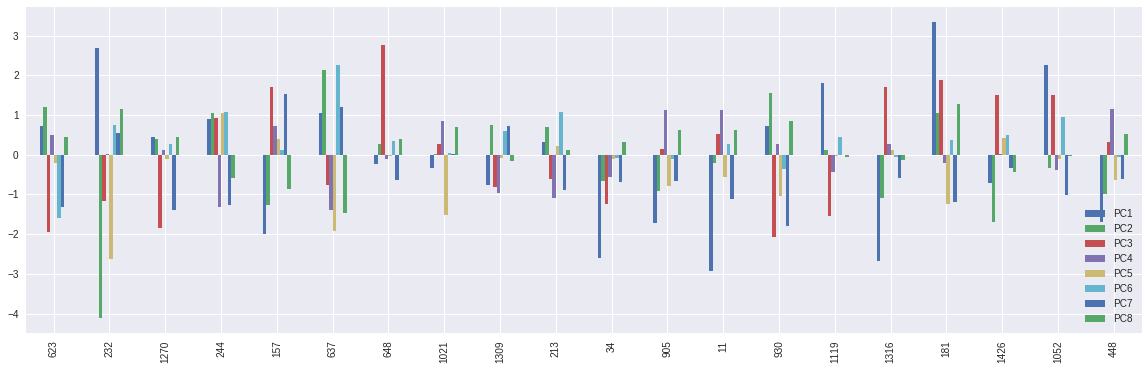

In [86]:
numeric_log_std_sc_out_rem_pca_df.sample(20).plot(kind = "bar", figsize = (20,6))

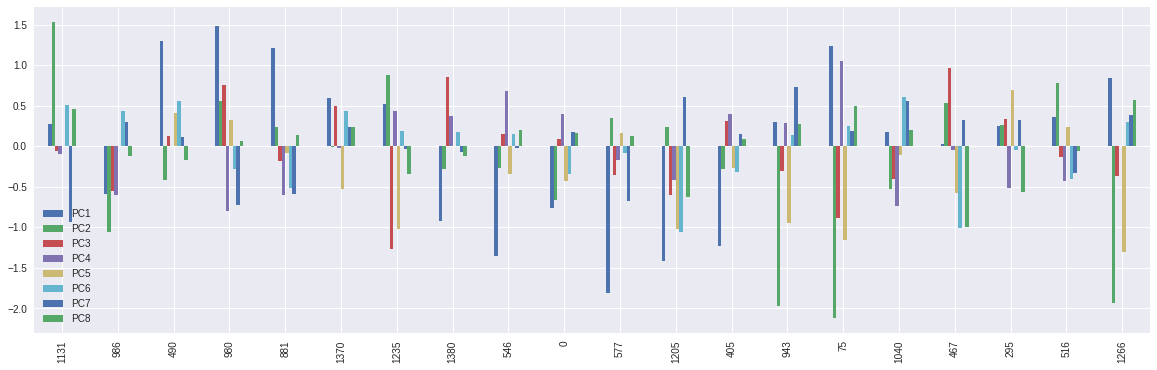

In [87]:
numeric_log_gel_sc_out_rem_pca_df.sample(20).plot(kind = "bar", figsize =(20,6))

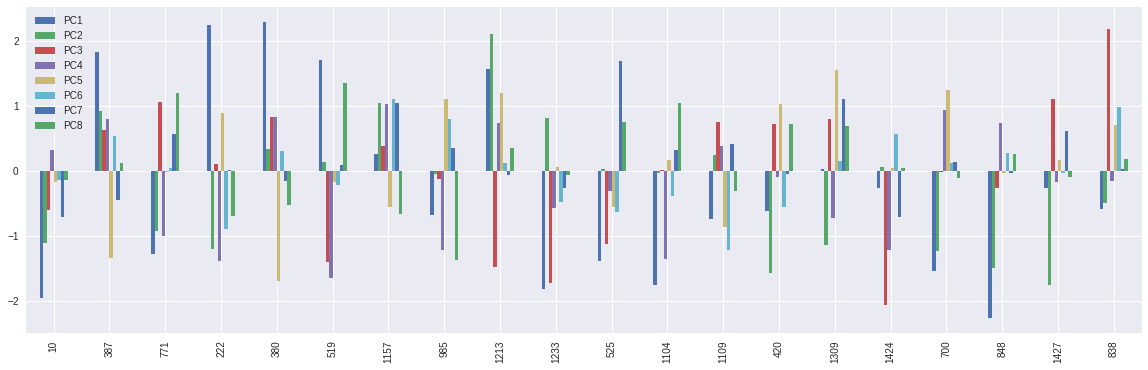

In [88]:
numeric_gelman_categorical_significant.pca_df.sample(20).plot(kind = "bar", figsize=(20,6))